In [59]:
print('Carson Hess, Cdhess@bgsu.edu // Gabrielle Zucchero-Hatchett, gzucche@bgsu.edu // Carol-Ann Durbin, Dcarola@bgsu.edu')

Carson Hess, Cdhess@bgsu.edu // Gabrielle Zucchero-Hatchett, gzucche@bgsu.edu // Carol-Ann Durbin, Dcarola@bgsu.edu


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
MPG = pd.read_csv('/Users/21car/Downloads/MPG.csv')
print (MPG.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin car manufacturer          car name  
0          70       1        chevrolet   chevelle malibu  
1          70       1            buick       skylark 320  
2          70       1         plymouth         satellite  
3          70       1              amc         rebel sst  
4          70       1             ford            torino  


In [9]:
MPG.dtypes

mpg                 float64
cylinders             int64
displacement        float64
horsepower          float64
weight                int64
acceleration        float64
model year            int64
origin                int64
car manufacturer     object
car name             object
dtype: object

C:\Users\21car\AppData\Local\Temp\ipykernel_32160\1784402717.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='car manufacturer', y='mpg', data=MPG, ci=None)


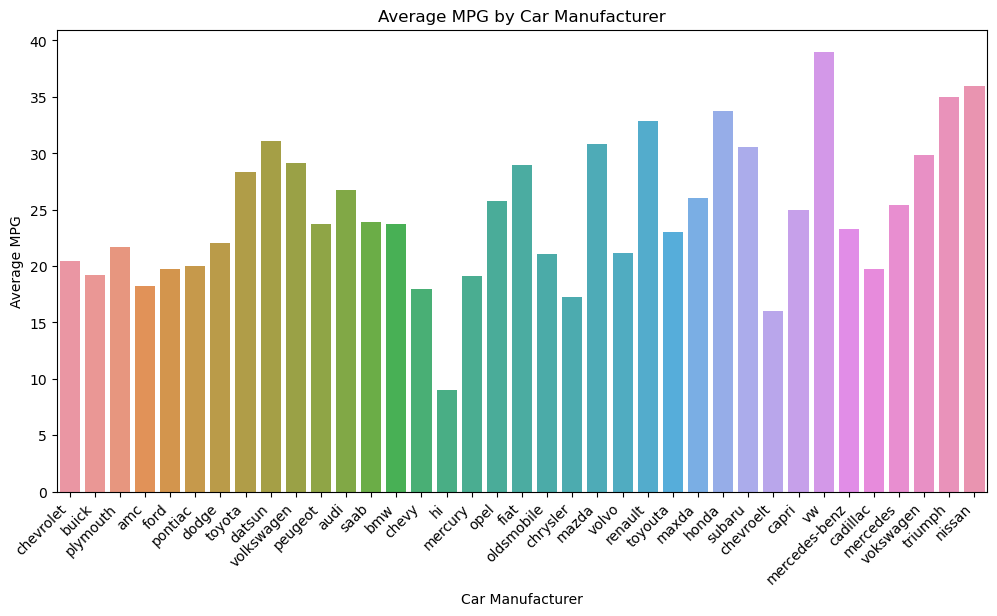

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='car manufacturer', y='mpg', data=MPG, ci=None)
plt.title('Average MPG by Car Manufacturer')
plt.xlabel('Car Manufacturer')
plt.ylabel('Average MPG')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
MPG['New_Data'] = pd.to

AttributeError: module 'pandas' has no attribute 'to'

In [41]:
data = {'Car': ['chevrolet', 'chevy', 'chevroelt', 'maxda', 'mercedes', 'toyouta', 'vokswagen', 'vw']}
df = pd.DataFrame(data)

name_mapping = {'chevy': 'chevrolet','chevroelt': 'chevrolet','maxda': 'mazda','mercedes': 'mercedes-benz','toyouta': 'toyota','vokswagen': 'volkswagen','vw': 'volkswagen'}

df['NewCar'] = df['Car'].map(lambda x: name_mapping.get(x, x))

print(df)

         Car         NewCar
0  chevrolet      chevrolet
1      chevy      chevrolet
2  chevroelt      chevrolet
3      maxda          mazda
4   mercedes  mercedes-benz
5    toyouta         toyota
6  vokswagen     volkswagen
7         vw     volkswagen


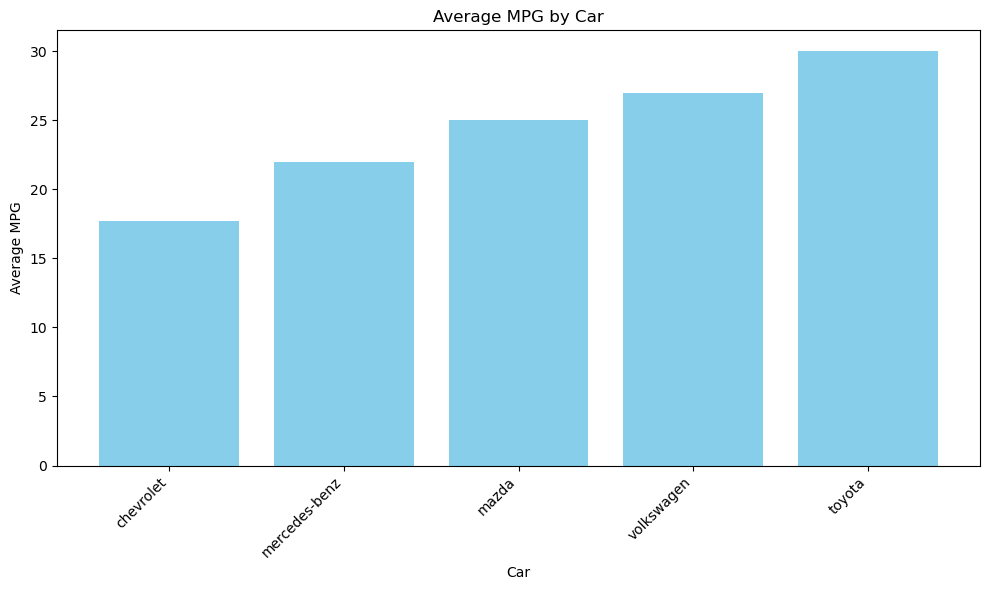

In [44]:
data = {'Car': ['chevrolet', 'chevy', 'chevroelt', 'maxda', 'mercedes', 'toyouta', 'vokswagen', 'vw'],
        'mpg': [18, 15, 20, 25, 22, 30, 28, 26],
        'NewCar': ['chevrolet', 'chevrolet', 'chevrolet', 'mazda', 'mercedes-benz', 'toyota', 'volkswagen', 'volkswagen']}
df = pd.DataFrame(data)

avg_mpg_df = df.groupby('NewCar')['mpg'].mean().reset_index()

avg_mpg_df = avg_mpg_df.sort_values(by='mpg')

plt.figure(figsize=(10, 6))
plt.bar(avg_mpg_df['NewCar'], avg_mpg_df['mpg'], color='skyblue')
plt.xlabel('Car')
plt.ylabel('Average MPG')
plt.title('Average MPG by Car')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [45]:
data = {'Car': ['chevrolet', 'chevy', 'chevroelt', 'maxda', 'mercedes', 'toyouta', 'vokswagen', 'vw'],
        'mpg': [18, 15, 20, 25, 22, 30, 28, 26],
        'NewCar': ['chevrolet', 'chevrolet', 'chevrolet', 'mazda', 'mercedes-benz', 'toyota', 'volkswagen', 'volkswagen']}
df = pd.DataFrame(data)

avg_mpg_df = df.groupby('NewCar')['mpg'].mean().reset_index()

bins = [0, 20, 30, float('inf')] 
labels = ['Low', 'Med', 'High']
avg_mpg_df['ManEff'] = pd.cut(avg_mpg_df['mpg'], bins=bins, labels=labels, right=False)

df = pd.merge(df, avg_mpg_df[['NewCar', 'ManEff']], how='left', on='NewCar')

print(df)

         Car  mpg         NewCar ManEff
0  chevrolet   18      chevrolet    Low
1      chevy   15      chevrolet    Low
2  chevroelt   20      chevrolet    Low
3      maxda   25          mazda    Med
4   mercedes   22  mercedes-benz    Med
5    toyouta   30         toyota   High
6  vokswagen   28     volkswagen    Med
7         vw   26     volkswagen    Med


In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [47]:
data = {'Car': ['chevrolet', 'chevy', 'chevroelt', 'maxda', 'mercedes', 'toyouta', 'vokswagen', 'vw'],
        'mpg': [18, 15, 20, 25, 22, 30, 28, 26],
        'NewCar': ['chevrolet', 'chevrolet', 'chevrolet', 'mazda', 'mercedes-benz', 'toyota', 'volkswagen', 'volkswagen'],
        'cylinders': [8, 8, 8, 4, 6, 4, 4, 4],
        'displacement': [307, 350, 318, 108, 227, 100, 140, 98],
        'horsepower': [130, 165, 150, 93, 155, 95, 90, 88],
        'weight': [3504, 3693, 3436, 2254, 3086, 2046, 2637, 2130],
        'acceleration': [12, 11.5, 11, 16.5, 15, 14, 16, 14]}

df = pd.DataFrame(data)

numeric_variables = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].copy()

print("NumericVariables DataFrame:")
print(numeric_variables)

NumericVariables DataFrame:
   cylinders  displacement  horsepower  weight  acceleration
0          8           307         130    3504          12.0
1          8           350         165    3693          11.5
2          8           318         150    3436          11.0
3          4           108          93    2254          16.5
4          6           227         155    3086          15.0
5          4           100          95    2046          14.0
6          4           140          90    2637          16.0
7          4            98          88    2130          14.0


In [48]:
numeric_variables = numeric_variables.dropna()

print("NumericVariables DataFrame after dropping missing values:")
print(numeric_variables)

NumericVariables DataFrame after dropping missing values:
   cylinders  displacement  horsepower  weight  acceleration
0          8           307         130    3504          12.0
1          8           350         165    3693          11.5
2          8           318         150    3436          11.0
3          4           108          93    2254          16.5
4          6           227         155    3086          15.0
5          4           100          95    2046          14.0
6          4           140          90    2637          16.0
7          4            98          88    2130          14.0


In [49]:
numeric_variables = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].copy()

numeric_variables = numeric_variables.dropna()

scaler = StandardScaler()
numeric_variables_standardized = scaler.fit_transform(numeric_variables)

pca = PCA()
principal_components = pca.fit_transform(numeric_variables_standardized)

pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(numeric_variables.shape[1])])

print("NumericVariables DataFrame after dropping missing values:")
print(numeric_variables)
print("\nDataFrame with Principal Components:")
print(pc_df)

NumericVariables DataFrame after dropping missing values:
   cylinders  displacement  horsepower  weight  acceleration
0          8           307         130    3504          12.0
1          8           350         165    3693          11.5
2          8           318         150    3436          11.0
3          4           108          93    2254          16.5
4          6           227         155    3086          15.0
5          4           100          95    2046          14.0
6          4           140          90    2637          16.0
7          4            98          88    2130          14.0

DataFrame with Principal Components:
        PC1       PC2       PC3       PC4       PC5
0  2.016430 -0.308144  0.561002 -0.149509 -0.035587
1  2.956629  0.106674 -0.138785  0.151646  0.053943
2  2.509024 -0.476611 -0.093712 -0.029587  0.007350
3 -2.300576  0.489277  0.139847 -0.179775  0.063834
4  0.563055  1.156723 -0.460205 -0.043730 -0.053652
5 -1.944329 -0.672292 -0.389732 -0.005517  

In [50]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

print("Explained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.3f}")

print("\nCumulative Explained Variance Ratio:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"PC{i+1}: {ratio:.3f}")

Explained Variance Ratio for each Principal Component:
PC1: 0.893
PC2: 0.077
PC3: 0.026
PC4: 0.003
PC5: 0.000

Cumulative Explained Variance Ratio:
PC1: 0.893
PC2: 0.971
PC3: 0.996
PC4: 1.000
PC5: 1.000


In [51]:
dominant_variable_pc1 = pd.DataFrame(pca.components_[0], index=numeric_variables.columns, columns=['PC1 Loadings'])
dominant_variable_pc1 = dominant_variable_pc1.sort_values(by='PC1 Loadings', ascending=False)

print("Dominant variable in PC1:")
print(dominant_variable_pc1)

Dominant variable in PC1:
              PC1 Loadings
displacement      0.470205
cylinders         0.468774
weight            0.456936
horsepower        0.435238
acceleration     -0.401168


In [52]:
print('displacement appears to be the dominant variable')

displacement appears to be the dominant variable


In [56]:
from sklearn.preprocessing import scale

In [57]:
numeric_variables_standardized = scale(numeric_variables)

print("Standardized NumericVariables DataFrame:")
print(pd.DataFrame(data=numeric_variables_standardized, columns=numeric_variables.columns))

Standardized NumericVariables DataFrame:
   cylinders  displacement  horsepower    weight  acceleration
0    1.21356      1.005100    0.301632  1.052941     -0.903696
1    1.21356      1.433013    1.442940  1.356419     -1.161895
2    1.21356      1.114566    0.953808  0.943753     -1.420094
3   -0.94388     -0.975245   -0.904895 -0.954190      1.420094
4    0.13484      0.208981    1.116852  0.381756      0.645497
5   -0.94388     -1.054857   -0.839677 -1.288177      0.129099
6   -0.94388     -0.656798   -1.002721 -0.339205      1.161895
7   -0.94388     -1.074760   -1.067939 -1.153298      0.129099


In [58]:
pca_scaled = PCA()
principal_components_scaled = pca_scaled.fit_transform(numeric_variables_standardized)

explained_variance_ratio_scaled = pca_scaled.explained_variance_ratio_
cumulative_variance_ratio_scaled = explained_variance_ratio_scaled.cumsum()

print("Explained Variance Ratio for each Principal Component (Scaled):")
for i, ratio in enumerate(explained_variance_ratio_scaled):
    print(f"PC{i+1}: {ratio:.3f}")

print("\nCumulative Explained Variance Ratio (Scaled):")
for i, ratio in enumerate(cumulative_variance_ratio_scaled):
    print(f"PC{i+1}: {ratio:.3f}")

dominant_variable_pc1_scaled = pd.DataFrame(pca_scaled.components_[0], index=numeric_variables_standardized.columns, columns=['PC1 Loadings Scaled'])
dominant_variable_pc1_scaled = dominant_variable_pc1_scaled.sort_values(by='PC1 Loadings Scaled', ascending=False)

Explained Variance Ratio for each Principal Component (Scaled):
PC1: 0.893
PC2: 0.077
PC3: 0.026
PC4: 0.003
PC5: 0.000

Cumulative Explained Variance Ratio (Scaled):
PC1: 0.893
PC2: 0.971
PC3: 0.996
PC4: 1.000
PC5: 1.000


AttributeError: 'numpy.ndarray' object has no attribute 'columns'